## Import Population Data by Boroughs

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
myfile = project.get_file("2020_population_new.csv")
myfile.seek(0)
import pandas as pd
nycpop_df = pd.read_csv(myfile)
nycpop_df

,Age Group,Borough,2010,2020,Change in Percent - 2010-2020
0,Total,Bronx,1385108,1446788,4.45
1,Total,Brooklyn,2552911,2648452,3.74
2,Total,Manhattan,1585873,1638281,3.30
3,Total,Queens,2250002,2330295,3.57
4,Total,Staten Island,468730,487155,3.93
5,SchoolAge,Bronx,265052,259013,-2.28
6,SchoolAge,Brooklyn,424704,441049,3.85
7,SchoolAge,Manhattan,157856,162931,3.21
8,SchoolAge,Queens,331926,341062,2.75
9,SchoolAge,Staten Island,80862,78759,-2.60


In [3]:
# simply drop unnecessary columns
nycpop_df.drop(["2010", "Change in Percent - 2010-2020"], axis=1, inplace=True)

# reset index, because we dropped 2 columns
nycpop_df.reset_index(drop=True, inplace=True)

nycpop_df

,Age Group,Borough,2020
0,Total,Bronx,1446788
1,Total,Brooklyn,2648452
2,Total,Manhattan,1638281
3,Total,Queens,2330295
4,Total,Staten Island,487155
5,SchoolAge,Bronx,259013
6,SchoolAge,Brooklyn,441049
7,SchoolAge,Manhattan,162931
8,SchoolAge,Queens,341062
9,SchoolAge,Staten Island,78759


In [4]:
import numpy as np  # useful for many scientific computing in Python
nycpop_df.rename(columns={'2020':'Population'}, inplace=True)

In [5]:
nycpop_df['Borough'] = nycpop_df['Borough'].str.strip()
nycpop_df

,Age Group,Borough,Population
0,Total,Bronx,1446788
1,Total,Brooklyn,2648452
2,Total,Manhattan,1638281
3,Total,Queens,2330295
4,Total,Staten Island,487155
5,SchoolAge,Bronx,259013
6,SchoolAge,Brooklyn,441049
7,SchoolAge,Manhattan,162931
8,SchoolAge,Queens,341062
9,SchoolAge,Staten Island,78759


In [6]:
tot_df = pd.DataFrame(nycpop_df[nycpop_df["Age Group"] == "Total"])
tot_df.drop(["Age Group"], axis=1, inplace=True)
tot_df.set_index('Borough', inplace=True)
tot_df.rename(columns = {'Population':'Population_Tot'}, inplace=True)
tot_df

,Population_Tot
Borough,
Bronx,1446788
Brooklyn,2648452
Manhattan,1638281
Queens,2330295
Staten Island,487155


In [7]:
sch_df = pd.DataFrame(nycpop_df[nycpop_df['Age Group'] == 'SchoolAge '])
sch_df.drop(['Age Group'], axis=1, inplace=True)
sch_df.set_index('Borough', inplace=True)
sch_df.rename(columns = {'Population':'Population_Sch'}, inplace=True)
sch_df

,Population_Sch
Borough,
Bronx,259013
Brooklyn,441049
Manhattan,162931
Queens,341062
Staten Island,78759


In [8]:
over65_df = pd.DataFrame(nycpop_df[nycpop_df["Age Group"] == "65 and over"])
over65_df.drop(["Age Group"], axis=1, inplace=True)
over65_df.set_index('Borough', inplace=True)
over65_df.rename(columns = {'Population':'Population_O65'}, inplace=True)
over65_df

,Population_O65
Borough,
Bronx,171856
Brooklyn,351609
Manhattan,250806
Queens,325300
Staten Island,77644


In [9]:
resulta = pd.merge(tot_df, sch_df, on=['Borough'])
resulta

,Population_Tot,Population_Sch
Borough,,
Bronx,1446788,259013
Brooklyn,2648452,441049
Manhattan,1638281,162931
Queens,2330295,341062
Staten Island,487155,78759


In [10]:
result = pd.merge(resulta, over65_df, on=['Borough'])
result
result.index
#result['Borough'] = 

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='Borough')

In [11]:

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [12]:
population = ['Total Population','School Age','Over 65']
indx = np.arange(len(population))
pop_label = np.arange(0,110,10)
print(result.T)
#nyc_list = list(result.T['New York City'])
bronx_list = list(result.T['Bronx'])
brooklyn_list = list(result.T['Brooklyn'])
manhattan_list = list(result.T['Manhattan'])
queens_list = list(result.T['Queens'])
staten_list = list(result.T['Staten Island'])

Borough           Bronx  Brooklyn  Manhattan   Queens  Staten Island
Population_Tot  1446788   2648452    1638281  2330295         487155
Population_Sch   259013    441049     162931   341062          78759
Population_O65   171856    351609     250806   325300          77644


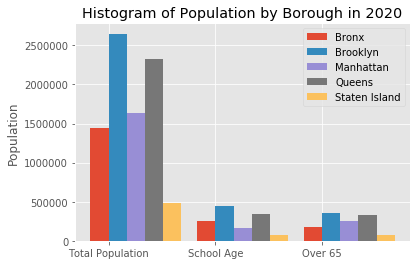

In [13]:
bar_width = 0.17
fig, ax = plt.subplots()
#barNYC = ax.bar(indx - bar_width/2, nyc_list, bar_width, label='New York City')
barbronx = ax.bar(indx - bar_width/2, bronx_list, bar_width, label='Bronx')
barbrooklyn = ax.bar(indx + bar_width/2 , brooklyn_list, bar_width, label='Brooklyn')
barmanhattan = ax.bar(indx + bar_width/2 + bar_width , manhattan_list, bar_width, label='Manhattan')
barqueens = ax.bar(indx + bar_width/2 + bar_width + bar_width , queens_list, bar_width, label='Queens')
barstatenisland = ax.bar(indx + bar_width/2 + bar_width + bar_width + bar_width , staten_list, bar_width, label='Staten Island')

ax.set_xticks(indx)
ax.set_xticklabels(population)
#ax.set_yticks(pop_label)
#ax.set_yticklabels(pop_label)
ax.legend()

plt.title('Histogram of Population by Borough in 2020') # add a title to the histogram
plt.ylabel('Population') # add y-label
#plt.xlabel('Boroughs') # add x-label

plt.show()

## Import Population Data by Neighborhood

In [14]:
myfile = project.get_file("New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv")
myfile.seek(0)
import pandas as pd
nycpop_df = pd.read_csv(myfile)
nycpop_df

,Borough,Year,FIPS_County_Code,NTA_Code,NTA_Name,Population,Latitude,Longitude
0,Manhattan,2010,61,MN12,Upper West Side,132378,40.787045,-73.975416
1,Queens,2010,81,QN28,Jackson Heights,108152,40.755656,-73.885775
2,Brooklyn,2010,47,BK88,Borough Park,106357,40.633993,-73.996806
3,Brooklyn,2010,47,BK42,Flatbush,105804,40.652048,-73.959027
4,Brooklyn,2010,47,BK61,Crown Heights North,103169,40.667471,-73.943566
5,Brooklyn,2010,47,BK82,East New York,91958,40.666770,-73.882358
6,Brooklyn,2010,47,BK28,Bensonhurst West,88727,40.604977,-73.993406
7,Queens,2010,81,QN29,Elmhurst,88427,40.736580,-73.878393
8,Manhattan,2010,61,MN36,Washington Heights South,84438,40.883325,-72.515328
9,Queens,2010,81,QN17,Forest Hills,83728,38.215348,-85.585793


In [15]:
nycpop_df.drop(["Year"], axis=1, inplace=True)
nycpop_df.rename(columns = {'NTA_Name':'Neighborhood', 'FIPS_County_Code':'County_Code'}, inplace=True)

In [16]:
nycpop_df['Borough'] = nycpop_df['Borough'].str.strip()
nycpop_df['Neighborhood'] = nycpop_df['Neighborhood'].str.strip()
nycpop_df.head()

,Borough,County_Code,NTA_Code,Neighborhood,Population,Latitude,Longitude
0,Manhattan,61,MN12,Upper West Side,132378,40.787045,-73.975416
1,Queens,81,QN28,Jackson Heights,108152,40.755656,-73.885775
2,Brooklyn,47,BK88,Borough Park,106357,40.633993,-73.996806
3,Brooklyn,47,BK42,Flatbush,105804,40.652048,-73.959027
4,Brooklyn,47,BK61,Crown Heights North,103169,40.667471,-73.943566


In [125]:
#nycpop_df.set_index('Neighborhood', inplace=True)

In [126]:
#nycpop_df.head()

,Borough,County_Code,NTA_Code,Population,Latitude,Longitude
Neighborhood,,,,,,
Claremont-Bathgate,Bronx,5,BX01,31078,NaN,NaN
Eastchester-Edenwald-Baychester,Bronx,5,BX03,34517,NaN,NaN
Bedford Park-Fordham North,Bronx,5,BX05,54415,NaN,NaN
Belmont,Bronx,5,BX06,27378,NaN,NaN
Bronxdale,Bronx,5,BX07,35538,NaN,NaN


In [17]:
nycpop_df.sort_values(['Population'], ascending=False, axis=0, inplace=True)

# get the top 25 entries
df_top25 = nycpop_df.head(25)

# transpose the dataframe
#df_top25.transpose() 

df_top25.head(25)

,Borough,County_Code,NTA_Code,Neighborhood,Population,Latitude,Longitude
0,Manhattan,61,MN12,Upper West Side,132378,40.787045,-73.975416
1,Queens,81,QN28,Jackson Heights,108152,40.755656,-73.885775
2,Brooklyn,47,BK88,Borough Park,106357,40.633993,-73.996806
3,Brooklyn,47,BK42,Flatbush,105804,40.652048,-73.959027
4,Brooklyn,47,BK61,Crown Heights North,103169,40.667471,-73.943566
5,Brooklyn,47,BK82,East New York,91958,40.666770,-73.882358
6,Brooklyn,47,BK28,Bensonhurst West,88727,40.604977,-73.993406
7,Queens,81,QN29,Elmhurst,88427,40.736580,-73.878393
8,Manhattan,61,MN36,Washington Heights South,84438,40.883325,-72.515328
9,Queens,81,QN17,Forest Hills,83728,38.215348,-85.585793


In [18]:
#df_top10 = df_top25.head(10)
#df_top10

In [19]:
#df_ntop10 = df_top25.tail(15)
#df_ntop10

In [20]:
#import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [21]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [153]:
#for ind in np.arange(10):
#    address = df_top10.index[ind]
#    print(address)
#    geolocator = Nominatim(user_agent="ny_explorer")
#    location = geolocator.geocode(address)
#    latitude = location.latitude
#    longitude = location.longitude
#    df_top10['Latitude'][ind] = latitude
#    df_top10['Longitude'][ind] = longitude
#    print('The geograpical coordinate of ', address, ' are {}, {}.'.format(latitude, longitude))
#df_top10.head()

In [154]:
#df_top10.reset_index(inplace = True, drop = False)
#df_top10

In [22]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_top25['Latitude'], df_top25['Longitude'], df_top25['Borough'], df_top25['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [24]:
!wget -q -O 'data-by-modzcta.csv' https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv
print('Data downloaded!')

Data downloaded!


In [25]:
covid_df = pd.read_csv('data-by-modzcta.csv')
covid_df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,366,1553.28,23563.03,21,89.12,15.38
1,10002,Chinatown/Lower East Side,Manhattan,1056,1375.80,76755.41,149,194.12,20.86
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,450,836.41,53801.62,33,61.34,12.18
3,10004,Financial District,Manhattan,31,849.17,3650.61,1,27.39,12.11
4,10005,Financial District,Manhattan,61,726.53,8396.11,2,23.82,10.76


In [26]:
# simply drop unnecessary columns
covid_df.drop(["COVID_CASE_RATE", "POP_DENOMINATOR", "COVID_DEATH_RATE"], axis=1, inplace=True)

# reset index, because we dropped 2 columns
covid_df.reset_index(drop=True, inplace=True)
covid_df.rename(columns = {'MODIFIED_ZCTA':'ZIP_CODE', 'NEIGHBORHOOD_NAME':'NEIGHBORHOOD', 'BOROUGH_GROUP':'BOROUGH'}, inplace=True)

In [27]:
covid_df['BOROUGH'] = covid_df['BOROUGH'].str.strip()
covid_df['NEIGHBORHOOD'] = covid_df['NEIGHBORHOOD'].str.strip()
covid_df.head()

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,366,21,15.38
1,10002,Chinatown/Lower East Side,Manhattan,1056,149,20.86
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,450,33,12.18
3,10004,Financial District,Manhattan,31,1,12.11
4,10005,Financial District,Manhattan,61,2,10.76


In [28]:
covid_df.shape

(177, 6)

In [29]:
df = pd.DataFrame(covid_df)
df.drop(["NEIGHBORHOOD", "BOROUGH"], axis=1, inplace=True)
df.head()

,ZIP_CODE,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE
0,10001,366,21,15.38
1,10002,1056,149,20.86
2,10003,450,33,12.18
3,10004,31,1,12.11
4,10005,61,2,10.76


In [30]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-9.44140674e-01, -9.77786980e-01, -1.25381969e+00],
       [-7.48043512e-02,  6.82091772e-01, -4.05272400e-01],
       [-8.38308426e-01, -8.22173347e-01, -1.74932176e+00],
       [-1.36620976e+00, -1.23714304e+00, -1.76016086e+00],
       [-1.32841253e+00, -1.22417523e+00, -1.96920080e+00],
       [-1.37502911e+00, -1.25011084e+00, -2.19527361e+00],
       [-1.33219225e+00, -1.21120743e+00, -2.16585318e+00],
       [-5.34670667e-01, -4.07203659e-01, -1.33124189e+00],
       [-1.06887154e+00, -9.90754783e-01, -2.14262652e+00],
       [-7.47595071e-01, -7.70302136e-01, -1.52789427e+00],
       [-1.20116185e+00, -1.13340061e+00, -1.85926128e+00],
       [-1.07517108e+00, -9.90754783e-01, -1.61305869e+00],
       [-1.02855449e+00, -9.38883572e-01, -1.68119022e+00],
       [-5.39710298e-01, -6.27656306e-01, -1.53873338e+00],
       [-1.22510009e+00, -1.17230402e+00, -1.92274748e+00],
       [-1.14824572e+00, -1.21120743e+00, -1.10207218e+00],
       [-6.49322269e-01, -6.92495320e-01

In [31]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 1 0 0 1 0 0 0 2 2 2 0 0
 0 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 0 1 2 2 2 2 0 2 2 2 2 1 1 2 1 1 1 0 1 1 1 0 1 2 2 2 1 1 1 0 2 1
 1 0 1 0 1 1 2 0 0 1 1 1 0 2 0 1 0 0 0 0 2 2 0 2 2 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 2]


In [32]:
df["Labels"] = labels
df

,ZIP_CODE,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,Labels
0,10001,366,21,15.38,2
1,10002,1056,149,20.86,0
2,10003,450,33,12.18,2
3,10004,31,1,12.11,2
4,10005,61,2,10.76,2
5,10006,24,0,9.30,2
6,10007,58,3,9.49,2
7,10009,691,65,14.88,2
8,10010,267,20,9.64,2
9,10011,522,37,13.61,2


In [33]:
df.groupby('Labels').mean()

,ZIP_CODE,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE
Labels,,,,
0,10946.957746,892.521127,69.690141,26.772394
1,10924.074074,2093.092593,191.981481,27.105926
2,10505.826923,404.326923,33.615385,15.210000


In [34]:
k_means_labels = k_means.labels_
print(k_means_labels)
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 1 0 0 1 0 0 0 2 2 2 0 0
 0 2 2 2 2 2 2 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 0 1 2 2 2 2 0 2 2 2 2 1 1 2 1 1 1 0 1 1 1 0 1 2 2 2 1 1 1 0 2 1
 1 0 1 0 1 1 2 0 0 1 1 1 0 2 0 1 0 0 0 0 2 2 0 2 2 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 2]
[[-0.28077264 -0.34638284  0.51022873]
 [ 1.23183661  1.23946715  0.56187423]
 [-0.89585229 -0.81419316 -1.28014324]]


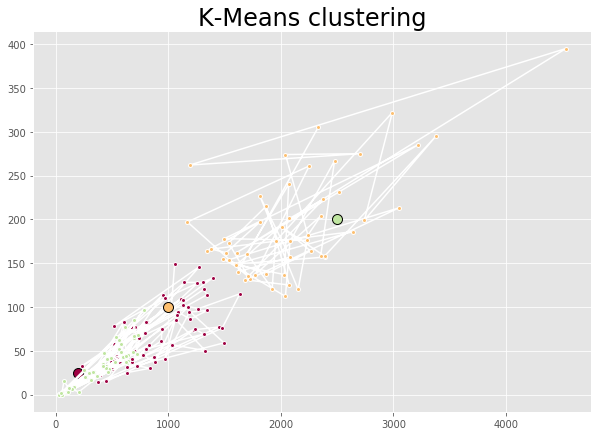

In [35]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 7))
k_means_cluster_centers = [[200,25],[1000, 100],[2500, 200]]

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
#colmap = {1: 'r', 2: 'b', 3: 'g'}
#colors = map(lambda x: colmap[x+1], k_means_labels)

#colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
colors = plt.cm.Spectral(np.linspace(0, 1, 4))
# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len(k_means_cluster_centers)), colors):
#for k, col in zip(range(len([[250,30], [1000, 100], [2000, 175]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=8)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
#ax.set_xticks(())

# remove y-axis ticks
#ax.set_yticks(())

# add labels to axes
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('', fontsize=20)
    
# add title to figure
ax.set_title('K-Means clustering', fontsize=24)

# show the plot
plt.show()

In [36]:
covid_df.head()

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,366,21,15.38
1,10002,Chinatown/Lower East Side,Manhattan,1056,149,20.86
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,450,33,12.18
3,10004,Financial District,Manhattan,31,1,12.11
4,10005,Financial District,Manhattan,61,2,10.76


In [37]:
#Neighborhoods with the highest case count, death count and positive percent
covid_df.sort_values(['COVID_CASE_COUNT'], ascending=False, axis=0, inplace=True)
# get the top 25 entries
top25_df = covid_df.head(10)
top25_df

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE
139,11368,Corona/North Corona,Queens,4534,395,34.57
72,10467,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,3379,295,30.48
143,11373,Elmhurst,Queens,3218,285,30.55
106,11219,Borough Park,Brooklyn,3047,213,21.92
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,2991,322,30.69
73,10468,Fordham/Kingsbridge/University Heights,Bronx,2743,199,28.36
122,11236,Canarsie,Brooklyn,2706,275,29.80
55,10314,Bloomfield/Freshkills Park,Staten Island,2641,186,25.99
142,11372,Jackson Heights,Queens,2513,231,31.42
61,10456,Claremont/Morrisania,Bronx,2478,267,27.32


In [38]:
# The code was removed by Watson Studio for sharing.

In [39]:
myfile = project.get_file("us_zip_code_latitude_and_longitude.csv")
myfile.seek(0)
#nylatlong_df = pd.read_csv(myfile)
#nylatlong_df
import numpy as np
arr = np.genfromtxt(myfile,dtype='str',delimiter=';')
nylatlong_df = pd.DataFrame(arr)
nylatlong_df.head()

,0,1,2,3,4,5,6,7
0,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
1,14043,Depew,NY,42.904958,-78.7006,-5,1,"42.904958,-78.7006"
2,13827,Owego,NY,42.120274,-76.25874,-5,1,"42.120274,-76.25874"
3,14739,Friendship,NY,42.192384,-78.14308,-5,1,"42.192384,-78.14308"
4,11703,North Babylon,NY,40.733398,-73.32257,-5,1,"40.733398,-73.32257"


In [40]:
nylatlong_df.drop([1,2,5,6,7], axis=1, inplace=True)
nylatlong_df.head()

,0,3,4
0,Zip,Latitude,Longitude
1,14043,42.904958,-78.7006
2,13827,42.120274,-76.25874
3,14739,42.192384,-78.14308
4,11703,40.733398,-73.32257


In [41]:
nylatlong_df.columns=['ZIP_CODE','LATITUDE','LONGITUDE']
nylatlong_df.head()

,ZIP_CODE,LATITUDE,LONGITUDE
0,Zip,Latitude,Longitude
1,14043,42.904958,-78.7006
2,13827,42.120274,-76.25874
3,14739,42.192384,-78.14308
4,11703,40.733398,-73.32257


In [42]:
nylatlong_df.drop([0], axis=0, inplace=True)
nylatlong_df.head()

,ZIP_CODE,LATITUDE,LONGITUDE
1,14043,42.904958,-78.7006
2,13827,42.120274,-76.25874
3,14739,42.192384,-78.14308
4,11703,40.733398,-73.32257
5,11707,40.922326,-72.637078


In [43]:
# reset index, because we dropped 2 columns
nylatlong_df.reset_index(inplace=True)
nylatlong_df.head()

,index,ZIP_CODE,LATITUDE,LONGITUDE
0,1,14043,42.904958,-78.7006
1,2,13827,42.120274,-76.25874
2,3,14739,42.192384,-78.14308
3,4,11703,40.733398,-73.32257
4,5,11707,40.922326,-72.637078


In [44]:
nylatlong_df['ZIP_CODE'] = nylatlong_df['ZIP_CODE'].astype(str)
covid_df['ZIP_CODE'] = covid_df['ZIP_CODE'].astype(str)

In [45]:
merged_df = pd.merge(covid_df, nylatlong_df, on=['ZIP_CODE'])
merged_df.head()

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,index,LATITUDE,LONGITUDE
0,11368,Corona/North Corona,Queens,4534,395,34.57,1358,40.747106,-73.85838
1,10467,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,3379,295,30.48,919,40.872265,-73.86937
2,11373,Elmhurst,Queens,3218,285,30.55,1102,40.736076,-73.87804
3,11219,Borough Park,Brooklyn,3047,213,21.92,290,40.632449,-73.99629
4,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,2991,322,30.69,1012,40.868643,-73.84735


In [46]:
merged_df['LATITUDE'] = merged_df['LATITUDE'].astype(np.float16)
merged_df['LONGITUDE'] = merged_df['LONGITUDE'].astype(np.float16)

In [47]:
#Neighborhoods with the highest case count
merged_df.sort_values(['COVID_CASE_COUNT'], ascending=False, axis=0, inplace=True)
# get the top 25 entries
top25_df = merged_df.head(25)
top25_df

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,index,LATITUDE,LONGITUDE
0,11368,Corona/North Corona,Queens,4534,395,34.57,1358,40.75000,-73.8750
1,10467,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,3379,295,30.48,919,40.87500,-73.8750
2,11373,Elmhurst,Queens,3218,285,30.55,1102,40.75000,-73.8750
3,11219,Borough Park,Brooklyn,3047,213,21.92,290,40.62500,-74.0000
4,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,2991,322,30.69,1012,40.87500,-73.8750
5,10468,Fordham/Kingsbridge/University Heights,Bronx,2743,199,28.36,636,40.87500,-73.8750
6,11236,Canarsie,Brooklyn,2706,275,29.80,2164,40.62500,-73.8750
7,10314,Bloomfield/Freshkills Park,Staten Island,2641,186,25.99,1675,40.59375,-74.1250
8,11372,Jackson Heights,Queens,2513,231,31.42,158,40.75000,-73.8750
9,10456,Claremont/Morrisania,Bronx,2478,267,27.32,698,40.84375,-73.9375


In [48]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [49]:
# create map of NYC using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=10)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>NEIGHBORHOODS WITH HIGHEST COVID-19 CASE COUNTS</b></h3>
             '''
map_nyc.get_root().html.add_child(folium.Element(title_html))
# add markers to map
for lat, lng, borough, neighborhood, covidcounts, coviddeaths, pcpositive in zip(top25_df['LATITUDE'], top25_df['LONGITUDE'], top25_df['BOROUGH'], top25_df['NEIGHBORHOOD'], top25_df['COVID_CASE_COUNT'], top25_df['COVID_DEATH_COUNT'], top25_df['PERCENT_POSITIVE']):
    label = '{}, {}, Covid Case Count: {}, Covid Death Count: {}, Percent Positive: {}%'.format(neighborhood, borough, covidcounts, coviddeaths, pcpositive)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

In [80]:
top25_df

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,index,LATITUDE,LONGITUDE
0,11368,Corona/North Corona,Queens,4534,395,34.57,1358,40.75000,-73.8750
1,10467,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,3379,295,30.48,919,40.87500,-73.8750
2,11373,Elmhurst,Queens,3218,285,30.55,1102,40.75000,-73.8750
3,11219,Borough Park,Brooklyn,3047,213,21.92,290,40.62500,-74.0000
4,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,2991,322,30.69,1012,40.87500,-73.8750
5,10468,Fordham/Kingsbridge/University Heights,Bronx,2743,199,28.36,636,40.87500,-73.8750
6,11236,Canarsie,Brooklyn,2706,275,29.80,2164,40.62500,-73.8750
7,10314,Bloomfield/Freshkills Park,Staten Island,2641,186,25.99,1675,40.59375,-74.1250
8,11372,Jackson Heights,Queens,2513,231,31.42,158,40.75000,-73.8750
9,10456,Claremont/Morrisania,Bronx,2478,267,27.32,698,40.84375,-73.9375


In [85]:
#boro_geo = r'newyork_data.json' # geojson file

# create a plain newyork map
#boro_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=12)
#boro_map

In [84]:
# generate choropleth map using the top25_df
#boro_map.choropleth(
#    geo_data = boro_geo,
#    data = top25_df,
#    columns = ['BOROUGH', 'COVID_CASE_COUNT'],
#    key_on = 'feature.properties.borough',
#    fill_color = 'YlOrRd', 
#    fill_opacity = 0.7, 
#    line_opacity = 0.2,
#    legend_name = 'Neighborhoods with Highest Covid-19 Case Counts',
#)

# display map
#boro_map

In [86]:
#Neighborhoods with the highest death count
merged_df.sort_values(['COVID_DEATH_COUNT'], ascending=False, axis=0, inplace=True)
# get the top 25 entries
top25_deathdf = merged_df.head(25)
top25_deathdf

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,index,LATITUDE,LONGITUDE
0,11368,Corona/North Corona,Queens,4534,395,34.57,1358,40.75000,-73.8750
4,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,2991,322,30.69,1012,40.87500,-73.8750
15,11691,Edgemere/Far Rockaway,Queens,2332,305,28.99,1143,40.59375,-73.7500
1,10467,Allerton/Norwood/Pelham Parkway/Williamsbridge,Bronx,3379,295,30.48,919,40.87500,-73.8750
2,11373,Elmhurst,Queens,3218,285,30.55,1102,40.75000,-73.8750
6,11236,Canarsie,Brooklyn,2706,275,29.80,2164,40.62500,-73.8750
27,11235,Brighton Beach/Manhattan Beach/Sheepshead Bay,Brooklyn,2041,274,24.72,1390,40.59375,-73.9375
9,10456,Claremont/Morrisania,Bronx,2478,267,27.32,698,40.84375,-73.9375
69,11354,Flushing/Murray Hill,Queens,1190,262,26.53,1628,40.78125,-73.8125
17,11226,Flatbush/Prospect Lefferts Gardens,Brooklyn,2253,261,27.24,1987,40.65625,-73.9375


In [87]:
# create map of NYC using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], tiles='CartoDB dark_matter', zoom_start=10)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NEIGHBORHOODS WITH HIGHEST COVID DEATH COUNTS</b></h3>
             '''
map_nyc.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng, borough, neighborhood, covidcounts, coviddeaths, pcpositive in zip(top25_deathdf['LATITUDE'], top25_deathdf['LONGITUDE'], top25_deathdf['BOROUGH'], top25_deathdf['NEIGHBORHOOD'], top25_deathdf['COVID_CASE_COUNT'], top25_deathdf['COVID_DEATH_COUNT'], top25_deathdf['PERCENT_POSITIVE']):
    label = '{}, {}, Covid Case Count: {}, Covid Death Count: {}, Percent Positive: {}%'.format(neighborhood, borough, covidcounts, coviddeaths, pcpositive)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

In [88]:
#Neighborhoods with the highest positive percent
merged_df.sort_values(['PERCENT_POSITIVE'], ascending=False, axis=0, inplace=True)
# get the top 25 entries
top25_pctposdf = merged_df.head(25)
top25_pctposdf

,ZIP_CODE,NEIGHBORHOOD,BOROUGH,COVID_CASE_COUNT,COVID_DEATH_COUNT,PERCENT_POSITIVE,index,LATITUDE,LONGITUDE
0,11368,Corona/North Corona,Queens,4534,395,34.57,1358,40.75000,-73.8750
43,11369,Airport/East Elmhurst,Queens,1607,162,34.46,1714,40.75000,-73.8750
110,11428,Queens Village,Queens,674,40,33.63,1406,40.71875,-73.7500
59,11370,Jackson Heights/Rikers Island,Queens,1329,50,33.06,1755,40.75000,-73.8750
30,10472,Soundview,Bronx,1954,175,32.34,1634,40.84375,-73.8750
109,11411,Cambria Heights,Queens,681,37,32.17,473,40.68750,-73.7500
61,11413,Laurelton/Rosedale,Queens,1314,69,32.05,1748,40.65625,-73.7500
78,11423,Hollis/Holliswood,Queens,1074,91,31.98,1094,40.71875,-73.7500
114,10302,Elm Park,Staten Island,633,31,31.86,1055,40.62500,-74.1250
66,11412,St. Albans,Queens,1234,75,31.64,1944,40.68750,-73.7500


In [89]:
# create map of NYC using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], tiles='Stamen Terrain', zoom_start=10)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NEIGHBORHOODS WITH HIGHEST PERCENT POSITIVE</b></h3>
             '''
map_nyc.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng, borough, neighborhood, covidcounts, coviddeaths, pcpositive in zip(top25_pctposdf['LATITUDE'], top25_pctposdf['LONGITUDE'], top25_pctposdf['BOROUGH'], top25_pctposdf['NEIGHBORHOOD'], top25_pctposdf['COVID_CASE_COUNT'], top25_pctposdf['COVID_DEATH_COUNT'], top25_pctposdf['PERCENT_POSITIVE']):
    label = '{}, {}, Covid Case Count: {}, Covid Death Count: {}, Percent Positive: {}%'.format(neighborhood, borough, covidcounts, coviddeaths, pcpositive)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

## Get hospital data

In [90]:
!wget -q -O 'hospital_data.json' https://www.newyorkled.com/maps/export/geojson/10/
print('Data downloaded!')


Data downloaded!


In [91]:
with open('hospital_data.json') as json_data:
    hospital_data = json.load(json_data)

In [92]:
hospital_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-73.845555, 40.848885]},
   'properties': {'id': '500',
    'name': 'Bronx - Albert Einstein Hospital- Hospital',
    'address': 'Albert Einstein Hospital- Hospital, Eastchester Road, Bronx, NY, United States',
    'zoom': '11.0',
    'icon': 'https://www.newyorkled.com/___AAABlog/wp-content/uploads/maps-marker-pro/icons/hospital-2.png',
    'popup': '<p><a href="http://www.montefiore.org/"><strong>Albert Einstein Hospital Website</strong></a></p>\n',
    'link': '',
    'maps': ['10']}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-73.91105, 40.843481]},
   'properties': {'id': '501',
    'name': 'Bronx - Bronx Lebanon Hospital Center',
    'address': 'Bronx-Lebanon Hospital Center, Grand Concourse, Bronx, NY, United States',
    'zoom': '11.0',
    'icon': 'https://www.newyorkled.com/___AAABlog/wp-content/uploads/maps-marker-pro/icons/hospital-2.

In [112]:
neighborhoods_data = hospital_data['features']
long=neighborhoods_data[0]['geometry']['coordinates'][0]
lat=neighborhoods_data[0]['geometry']['coordinates'][1]
name = neighborhoods_data[0]['properties']['name'].split('-')[1]
address = neighborhoods_data[0]['properties']['address']
borough = neighborhoods_data[0]['properties']['name'].split('-')[0]
print(borough, name)


Bronx   Albert Einstein Hospital


In [120]:
# define the dataframe columns
column_names = ['Hospital','Borough', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [121]:
for data in neighborhoods_data:
    neighborhood_borough = data['properties']['name'].split('-')[0]
    neighborhood_name = data['properties']['name'].split('-')[1]
    neighborhood_address = data['properties']['address']
    neighborhood_lat = data['geometry']['coordinates'][1]
    neighborhood_lon = data['geometry']['coordinates'][0]
    
    neighborhoods = neighborhoods.append({'Hospital': neighborhood_name,
                                          'Borough': neighborhood_borough,
                                          'Address': neighborhood_address,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [145]:
neighborhoods.head()

,Hospital,Borough,Address,Latitude,Longitude
0,Albert Einstein Hospital,Bronx,"Albert Einstein Hospital- Hospital, Eastcheste...",40.848885,-73.845555
1,Bronx Lebanon Hospital Center,Bronx,"Bronx-Lebanon Hospital Center, Grand Concourse...",40.843481,-73.911050
2,Bronx Lebanon Hospital Center,Bronx,"Bronx-Lebanon Hospital Center, Fulton Avenue, ...",40.831386,-73.903063
3,Calvary Hospital,Bronx,"Calvary Hospital, Eastchester Road, Bronx, NY,...",40.848126,-73.843523
4,Jacobi Medical Center,Bronx,"Jacobi Medical Center, Pelham Parkway South, N...",40.855673,-73.847908


In [139]:
neighborhoods.shape

(63, 5)

In [141]:
neighborhoods['Borough'].value_counts()

Manhattan         20
Brooklyn          16
Bronx             13
Queens            11
Staten Island      2
Manhatttan         1
Name: Borough, dtype: int64

In [137]:
# create map of NYC using Hospital latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], tiles = 'cartodbpositron', zoom_start=10)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS IN NEW YORK CITY</b></h3>
             '''
map_nyc.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng, borough, hospital, address in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Hospital'], neighborhoods['Address']):
    label = '{}, {}, {}'.format(hospital, borough, address)
    label = folium.Popup(label, parse_html=True)
    folium. CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

In [143]:
# The code was removed by Watson Studio for sharing.

## Explore Corona/North Corona Neighborhood in Queens

In [147]:
neighborhood_latitude = 40.75 # neighborhood latitude value
neighborhood_longitude = -73.875 # neighborhood longitude value

neighborhood_name = 'Corona/North Corona' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Corona/North Corona are 40.75, -73.875.


In [177]:
search_query = 'Hospital'
LIMIT = 30
radius = 3000
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=2NE3SMFGA3LJDVBIN0ZNVNPR42I2RUTKDAXDLAINT52HSWNU&client_secret=KG130HJAMRIMSUIWFSCLFXWWS31BUUGUXHWLUM4OQNBWXZF0&ll=40.75,-73.875&v=20180605&query=Hospital&radius=3000&limit=30'

In [178]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edfe934867c843e1aa9cb3c'},
 'response': {'venues': [{'id': '4be0708998f2a593de40c25a',
    'name': 'Elmhurst Hospital Center',
    'location': {'address': '79-01 Broadway',
     'crossStreet': 'at 78th St.',
     'lat': 40.745244498096774,
     'lng': -73.88553627660367,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.745244498096774,
       'lng': -73.88553627660367}],
     'distance': 1034,
     'postalCode': '11373',
     'cc': 'US',
     'city': 'Elmhurst',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['79-01 Broadway (at 78th St.)',
      'Elmhurst, NY 11373',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591732735',
    

In [179]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4be0708998f2a593de40c25a,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,Elmhurst Hospital Center,v-1591732735
1,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",False,4f506664e4b062d9d9d82106,79-01 Broadway,US,Elmhurst,United States,at Baxter Ave,1008,"[79-01 Broadway (at Baxter Ave), Elmhurst, NY ...","[{'label': 'display', 'lat': 40.74472221590628...",40.744722,-73.884716,11373,NY,Elmhurst Hospital ER (NYC EMS Hospital 32),v-1591732735
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4f392dc9e4b0653d4c81946b,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,Elmhurst Hospital Senior Care,v-1591732735
3,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",False,4fbfd89ee4b07a4edcdfe26b,78 St Broadway,US,Elmhurst,United States,NaN,1151,"[78 St Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74555382792512...",40.745554,-73.887334,11373,NY,Elmhurst Hospital ER,v-1591732735
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4b7d6f3df964a52009be2fe3,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,Long Island Jewish Forest Hills Hospital,v-1591732735


In [180]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital ER (NYC EMS Hospital 32),Emergency Room,79-01 Broadway,US,Elmhurst,United States,at Baxter Ave,1008,"[79-01 Broadway (at Baxter Ave), Elmhurst, NY ...","[{'label': 'display', 'lat': 40.74472221590628...",40.744722,-73.884716,11373,NY,4f506664e4b062d9d9d82106
2,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
3,Elmhurst Hospital ER,Emergency Room,78 St Broadway,US,Elmhurst,United States,NaN,1151,"[78 St Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74555382792512...",40.745554,-73.887334,11373,NY,4fbfd89ee4b07a4edcdfe26b
4,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
5,Elmhurst Hospital Center Mortuary Department,Hospital,79-01 Broadway,US,Elmhurst,United States,Baxter Av,1046,"[79-01 Broadway (Baxter Av), Elmhurst, NY 1137...","[{'label': 'display', 'lat': 40.74510955810547...",40.745110,-73.885597,11373,NY,4db8388ecda1051541235683
6,Elmhurst Hospital Center Clinics,Hospital,79-01 Broadway,US,Elmhurst,United States,NaN,950,"[79-01 Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74586850915786...",40.745869,-73.884859,11373,NY,4ec6c16c722eeaa24d2f719f
7,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
8,The Gift Shop At Elmhurst Hospital Center,Gift Shop,NaN,US,NaN,United States,NaN,1101,"[NY 11373, United States]","[{'label': 'display', 'lat': 40.74506311024849...",40.745063,-73.886324,11373,New York,4ee7930f6c2521dbe38203ac
9,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a


In [181]:
df_filtered = pd.DataFrame(dataframe_filtered[dataframe_filtered['categories'] == 'Hospital'])
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
2,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
3,Elmhurst Hospital Center Mortuary Department,Hospital,79-01 Broadway,US,Elmhurst,United States,Baxter Av,1046,"[79-01 Broadway (Baxter Av), Elmhurst, NY 1137...","[{'label': 'display', 'lat': 40.74510955810547...",40.745110,-73.885597,11373,NY,4db8388ecda1051541235683
4,Elmhurst Hospital Center Clinics,Hospital,79-01 Broadway,US,Elmhurst,United States,NaN,950,"[79-01 Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74586850915786...",40.745869,-73.884859,11373,NY,4ec6c16c722eeaa24d2f719f
5,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
6,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a
7,Elmhurst Hospital Womens Health Center,Hospital,78-20 41st Avenue,US,Elmhurst,United States,NaN,1132,"[78-20 41st Avenue, Elmhurst, NY 11374, United...","[{'label': 'display', 'lat': 40.74549881751365...",40.745499,-73.887046,11374,NY,5142fe07e4b03cf303b19298
8,Woodside Anumal Hospital,Hospital,50-10 69th St,US,Woodside,United States,NaN,2389,"[50-10 69th St, Woodside, NY 11377, United Sta...","[{'label': 'display', 'lat': 40.73668367920025...",40.736684,-73.897215,11377,NY,4d72ac4ed145a1cdfd8cb8f3


In [184]:
df_filtered.drop(8)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
2,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
3,Elmhurst Hospital Center Mortuary Department,Hospital,79-01 Broadway,US,Elmhurst,United States,Baxter Av,1046,"[79-01 Broadway (Baxter Av), Elmhurst, NY 1137...","[{'label': 'display', 'lat': 40.74510955810547...",40.745110,-73.885597,11373,NY,4db8388ecda1051541235683
4,Elmhurst Hospital Center Clinics,Hospital,79-01 Broadway,US,Elmhurst,United States,NaN,950,"[79-01 Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74586850915786...",40.745869,-73.884859,11373,NY,4ec6c16c722eeaa24d2f719f
5,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
6,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a
7,Elmhurst Hospital Womens Health Center,Hospital,78-20 41st Avenue,US,Elmhurst,United States,NaN,1132,"[78-20 41st Avenue, Elmhurst, NY 11374, United...","[{'label': 'display', 'lat': 40.74549881751365...",40.745499,-73.887046,11374,NY,5142fe07e4b03cf303b19298


In [185]:
latitude=40.75
longitude=-73.875

In [186]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Corona/North Corona neighborhood
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS SERVICING THE CORONA/NORTH CORONA NEIGHBORHOOD IN QUEENS</b></h3>
             '''
venues_map.get_root().html.add_child(folium.Element(title_html))
# add a blue circle marker to represent the neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Corona/North Corona',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Hospitals as red circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Explore Allerton/Norwood/Pelham Parkway/Williamsbridge Neighborhood in Bronx

In [187]:
neighborhood_latitude = 40.875 # neighborhood latitude value
neighborhood_longitude = -73.875 # neighborhood longitude value

neighborhood_name = 'Allerton/Norwood/Pelham Parkway/Williamsbridge' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Allerton/Norwood/Pelham Parkway/Williamsbridge are 40.875, -73.875.


In [188]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=2NE3SMFGA3LJDVBIN0ZNVNPR42I2RUTKDAXDLAINT52HSWNU&client_secret=KG130HJAMRIMSUIWFSCLFXWWS31BUUGUXHWLUM4OQNBWXZF0&ll=40.875,-73.875&v=20180605&query=Hospital&radius=3000&limit=30'

In [189]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edfec2708823562b25271d9'},
 'response': {'venues': [{'id': '4c3e307edb3b1b8d56106595',
    'name': 'The Children’s Hospital at Montefiore',
    'location': {'address': '3415 Bainbridge Ave',
     'crossStreet': 'at E Gun Hill Rd',
     'lat': 40.88063954722417,
     'lng': -73.87915344814844,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.88063954722417,
       'lng': -73.87915344814844},
      {'label': 'entrance', 'lat': 40.880819, 'lng': -73.878772}],
     'distance': 718,
     'postalCode': '10467',
     'cc': 'US',
     'city': 'Bronx',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['3415 Bainbridge Ave (at E Gun Hill Rd)',
      'Bronx, NY 10467',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',

In [190]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4c3e307edb3b1b8d56106595,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,The Children’s Hospital at Montefiore,v-1591733242,51101868
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4b6de6a8f964a520439a2ce3,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,North Central Bronx Hospital,v-1591733242,NaN
2,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4bd332cf77b29c74382f9082,18 E Kingsbridge Rd,US,Bronx,United States,at Jerome Ave,2030,"[18 E Kingsbridge Rd (at Jerome Ave), Bronx, N...","[{'label': 'display', 'lat': 40.86725, 'lng': ...",40.867250,-73.896830,10468,NY,Armory Dog and Cat Hospital,v-1591733242,422704190
3,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4bebe91f6295c9b679318808,5664 Broadway,US,Bronx,United States,NaN,2400,"[5664 Broadway, Bronx, NY 10463, United States]","[{'label': 'display', 'lat': 40.880833, 'lng':...",40.880833,-73.902452,10463,NY,Broadway Animal Hospital Of Riverdale,v-1591733242,NaN
4,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",False,4c9932179f259eb0d2f54885,1400 Pelham Pkwy S,US,Bronx,United States,Eastchester Rd.,3105,"[1400 Pelham Pkwy S (Eastchester Rd.), Bronx, ...","[{'label': 'display', 'lat': 40.85652542114258...",40.856525,-73.847366,10461,NY,Harvest Home Jacobi Hospital Farmers' Market,v-1591733242,NaN


In [191]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,Armory Dog and Cat Hospital,Veterinarian,18 E Kingsbridge Rd,US,Bronx,United States,at Jerome Ave,2030,"[18 E Kingsbridge Rd (at Jerome Ave), Bronx, N...","[{'label': 'display', 'lat': 40.86725, 'lng': ...",40.867250,-73.896830,10468,NY,4bd332cf77b29c74382f9082
3,Broadway Animal Hospital Of Riverdale,Veterinarian,5664 Broadway,US,Bronx,United States,NaN,2400,"[5664 Broadway, Bronx, NY 10463, United States]","[{'label': 'display', 'lat': 40.880833, 'lng':...",40.880833,-73.902452,10463,NY,4bebe91f6295c9b679318808
4,Harvest Home Jacobi Hospital Farmers' Market,Farmers Market,1400 Pelham Pkwy S,US,Bronx,United States,Eastchester Rd.,3105,"[1400 Pelham Pkwy S (Eastchester Rd.), Bronx, ...","[{'label': 'display', 'lat': 40.85652542114258...",40.856525,-73.847366,10461,NY,4c9932179f259eb0d2f54885
5,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
6,Montefiore Wakefield Emergency Room (NYC EMS H...,Emergency Room,NaN,US,Bronx,United States,NaN,2402,"[Bronx, NY, United States]","[{'label': 'display', 'lat': 40.89367983570939...",40.893680,-73.860706,NaN,NY,52d8c1ae11d21099f11ec5a0
7,Children's Hospital At Montefiore,Hospital,NaN,US,Bronx,United States,NaN,672,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88039137785859...",40.880391,-73.878600,10467,NY,50e6d8ffe4b075f63dd58289
8,Adolescent AIDS program At The Children's Hosp...,Hospital,NaN,US,Bronx,United States,NaN,700,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88105598218058...",40.881056,-73.877279,10467,NY,4f4d00dfe4b082dc5b340456
9,GVS @Montefiore Hospital Medical Art Pavilion,Optical Shop,3400 Bainbridge Ave,US,Bronx,United States,NaN,647,"[3400 Bainbridge Ave, Bronx, NY 10467, United ...","[{'label': 'display', 'lat': 40.88011932373047...",40.880119,-73.878662,10467,NY,5b988010f96b2c002c6adbae


In [192]:
df_filtered = pd.DataFrame(dataframe_filtered[dataframe_filtered['categories'] == 'Hospital'])
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
3,Children's Hospital At Montefiore,Hospital,NaN,US,Bronx,United States,NaN,672,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88039137785859...",40.880391,-73.878600,10467,NY,50e6d8ffe4b075f63dd58289
4,Adolescent AIDS program At The Children's Hosp...,Hospital,NaN,US,Bronx,United States,NaN,700,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88105598218058...",40.881056,-73.877279,10467,NY,4f4d00dfe4b082dc5b340456
5,Montefiore Hospital Adult medicine practice,Hospital,3444 Kossuth Ave,US,Bronx,United States,E. Gunhill Rd.,865,"[3444 Kossuth Ave (E. Gunhill Rd.), Bronx, NY ...","[{'label': 'display', 'lat': 40.881245, 'lng':...",40.881245,-73.881121,10467,NY,50630a42e4b0530cb8d3e6f5
6,NYC Health + Hospitals/Jacobi,Hospital,1400 Pelham Pkwy S,US,Bronx,United States,at Eastchester Rd,3124,"[1400 Pelham Pkwy S (at Eastchester Rd), Bronx...","[{'label': 'display', 'lat': 40.85680869123934...",40.856809,-73.846739,10461,NY,4ae0c9e6f964a5207f8221e3
7,Montefiore Medical Center,Hospital,111 E 210th St,US,Bronx,United States,NaN,738,"[111 E 210th St, Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.87993788345708...",40.879938,-73.880868,10467,NY,4ae06d2df964a520347f21e3
8,St Barnabas Hospital Human Resource Dept,Hospital,NaN,US,Bronx,United States,NaN,2811,"[Bronx, NY 10457, United States]","[{'label': 'display', 'lat': 40.85314963490056...",40.853150,-73.891749,10457,NY,4f8c2ce2e4b0e6f34b0afe8c
9,Montefiore Medical Center - Wakefield Campus,Hospital,600 E 233rd St,US,Bronx,United States,Carpenter Ave.,2449,"[600 E 233rd St (Carpenter Ave.), Bronx, NY 10...","[{'label': 'display', 'lat': 40.89420660561763...",40.894207,-73.860790,10466,NY,4addedeaf964a520646621e3


In [198]:
df_filtered.drop(3,inplace = True)
df_filtered.drop(4,inplace = True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
5,Montefiore Hospital Adult medicine practice,Hospital,3444 Kossuth Ave,US,Bronx,United States,E. Gunhill Rd.,865,"[3444 Kossuth Ave (E. Gunhill Rd.), Bronx, NY ...","[{'label': 'display', 'lat': 40.881245, 'lng':...",40.881245,-73.881121,10467,NY,50630a42e4b0530cb8d3e6f5
6,NYC Health + Hospitals/Jacobi,Hospital,1400 Pelham Pkwy S,US,Bronx,United States,at Eastchester Rd,3124,"[1400 Pelham Pkwy S (at Eastchester Rd), Bronx...","[{'label': 'display', 'lat': 40.85680869123934...",40.856809,-73.846739,10461,NY,4ae0c9e6f964a5207f8221e3
7,Montefiore Medical Center,Hospital,111 E 210th St,US,Bronx,United States,NaN,738,"[111 E 210th St, Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.87993788345708...",40.879938,-73.880868,10467,NY,4ae06d2df964a520347f21e3
8,St Barnabas Hospital Human Resource Dept,Hospital,NaN,US,Bronx,United States,NaN,2811,"[Bronx, NY 10457, United States]","[{'label': 'display', 'lat': 40.85314963490056...",40.853150,-73.891749,10457,NY,4f8c2ce2e4b0e6f34b0afe8c
9,Montefiore Medical Center - Wakefield Campus,Hospital,600 E 233rd St,US,Bronx,United States,Carpenter Ave.,2449,"[600 E 233rd St (Carpenter Ave.), Bronx, NY 10...","[{'label': 'display', 'lat': 40.89420660561763...",40.894207,-73.860790,10466,NY,4addedeaf964a520646621e3
10,Bronx VA Medical Center,Hospital,130 W Kingsbridge Rd,US,Bronx,United States,Webb Ave,2747,"[130 W Kingsbridge Rd (Webb Ave), Bronx, NY 10...","[{'label': 'display', 'lat': 40.86717211737055...",40.867172,-73.905960,10468,NY,4b0a9041f964a520212523e3


In [200]:
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
3,Montefiore Hospital Adult medicine practice,Hospital,3444 Kossuth Ave,US,Bronx,United States,E. Gunhill Rd.,865,"[3444 Kossuth Ave (E. Gunhill Rd.), Bronx, NY ...","[{'label': 'display', 'lat': 40.881245, 'lng':...",40.881245,-73.881121,10467,NY,50630a42e4b0530cb8d3e6f5
4,NYC Health + Hospitals/Jacobi,Hospital,1400 Pelham Pkwy S,US,Bronx,United States,at Eastchester Rd,3124,"[1400 Pelham Pkwy S (at Eastchester Rd), Bronx...","[{'label': 'display', 'lat': 40.85680869123934...",40.856809,-73.846739,10461,NY,4ae0c9e6f964a5207f8221e3
5,Montefiore Medical Center,Hospital,111 E 210th St,US,Bronx,United States,NaN,738,"[111 E 210th St, Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.87993788345708...",40.879938,-73.880868,10467,NY,4ae06d2df964a520347f21e3
6,St Barnabas Hospital Human Resource Dept,Hospital,NaN,US,Bronx,United States,NaN,2811,"[Bronx, NY 10457, United States]","[{'label': 'display', 'lat': 40.85314963490056...",40.853150,-73.891749,10457,NY,4f8c2ce2e4b0e6f34b0afe8c
7,Montefiore Medical Center - Wakefield Campus,Hospital,600 E 233rd St,US,Bronx,United States,Carpenter Ave.,2449,"[600 E 233rd St (Carpenter Ave.), Bronx, NY 10...","[{'label': 'display', 'lat': 40.89420660561763...",40.894207,-73.860790,10466,NY,4addedeaf964a520646621e3
8,Bronx VA Medical Center,Hospital,130 W Kingsbridge Rd,US,Bronx,United States,Webb Ave,2747,"[130 W Kingsbridge Rd (Webb Ave), Bronx, NY 10...","[{'label': 'display', 'lat': 40.86717211737055...",40.867172,-73.905960,10468,NY,4b0a9041f964a520212523e3


In [201]:
latitude=40.875
longitude=-73.875

In [202]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Corona/North Corona neighborhood
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS SERVICING THE ALLERTON/NORWOOD/PELHAM PARKWAY/WILLIAMSBRIDGE NEIGHBORHOOD IN THE BRONX</b></h3>
             '''
venues_map.get_root().html.add_child(folium.Element(title_html))
# add a blue circle marker to represent the neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Allerton/Norwood/Pelham Parkway/Williamsbridge',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Hospitals as red circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Explore Elmhurst Neighborhood in Queens

In [203]:
neighborhood_latitude = 40.75 # neighborhood latitude value
neighborhood_longitude = -73.75 # neighborhood longitude value

neighborhood_name = 'Elmhurst' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Elmhurst are 40.75, -73.75.


In [204]:
search_query = 'Hospital'
LIMIT = 30
radius = 3000
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=2NE3SMFGA3LJDVBIN0ZNVNPR42I2RUTKDAXDLAINT52HSWNU&client_secret=KG130HJAMRIMSUIWFSCLFXWWS31BUUGUXHWLUM4OQNBWXZF0&ll=40.75,-73.75&v=20180605&query=Hospital&radius=3000&limit=30'

In [205]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edff2ee0ed92b6704eb1b19'},
 'response': {'venues': [{'id': '4bb0f5bbf964a520fc6d3ce3',
    'name': 'St. Mary Hospital for Children',
    'location': {'address': '29-01 216th St',
     'lat': 40.77677744162408,
     'lng': -73.76874640629698,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.77677744162408,
       'lng': -73.76874640629698}],
     'distance': 3373,
     'postalCode': '11360',
     'cc': 'US',
     'city': 'Bayside',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['29-01 216th St',
      'Bayside, NY 11360',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591735211',
    'hasPerk': False},
   {'id': '4dce8441887785124

In [206]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4bb0f5bbf964a520fc6d3ce3,29-01 216th St,US,Bayside,United States,NaN,3373,"[29-01 216th St, Bayside, NY 11360, United Sta...","[{'label': 'display', 'lat': 40.77677744162408...",40.776777,-73.768746,11360,NY,St. Mary Hospital for Children,v-1591735211,NaN
1,"[{'id': '4e52d2d203646f7c19daa8ae', 'name': 'A...",False,4dce84418877851243f8ecae,42-02 215th Street,US,Bayside,United States,at 42nd Ave,2110,"[42-02 215th Street (at 42nd Ave), Bayside, NY...","[{'label': 'display', 'lat': 40.762794, 'lng':...",40.762794,-73.768463,11361,NY,VitalPet - North Shore Animal Hospital,v-1591735211,535273299
2,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,4f4ea2e3e4b05017c82f71ce,865 Northern Blvd Ste 102,US,Great Neck,United States,Northern Blvd & Allen Drive,1293,[865 Northern Blvd Ste 102 (Northern Blvd & Al...,"[{'label': 'display', 'lat': 40.74625619510340...",40.746256,-73.735486,11021,NY,North Shore University Hospital Internal Medicine,v-1591735211,NaN
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4db9eadaa86ede8c0f8e86da,NaN,US,NaN,United States,NaN,1622,"[New York, United States]","[{'label': 'display', 'lat': 40.76081981263885...",40.760820,-73.762900,NaN,New York,Deborah Hospital Foundation,v-1591735211,NaN
4,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,5e5e33907aa26f0007509165,29738 Rancho California Rd #A,US,Temecula,United States,NaN,2006,"[29738 Rancho California Rd #A, Temecula, CA 9...","[{'label': 'display', 'lat': 40.76134963935858...",40.761350,-73.768478,92591,CA,Care Animal Hospital,v-1591735211,NaN


In [207]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,St. Mary Hospital for Children,Hospital,29-01 216th St,US,Bayside,United States,NaN,3373,"[29-01 216th St, Bayside, NY 11360, United Sta...","[{'label': 'display', 'lat': 40.77677744162408...",40.776777,-73.768746,11360,NY,4bb0f5bbf964a520fc6d3ce3
1,VitalPet - North Shore Animal Hospital,Animal Shelter,42-02 215th Street,US,Bayside,United States,at 42nd Ave,2110,"[42-02 215th Street (at 42nd Ave), Bayside, NY...","[{'label': 'display', 'lat': 40.762794, 'lng':...",40.762794,-73.768463,11361,NY,4dce84418877851243f8ecae
2,North Shore University Hospital Internal Medicine,Doctor's Office,865 Northern Blvd Ste 102,US,Great Neck,United States,Northern Blvd & Allen Drive,1293,[865 Northern Blvd Ste 102 (Northern Blvd & Al...,"[{'label': 'display', 'lat': 40.74625619510340...",40.746256,-73.735486,11021,NY,4f4ea2e3e4b05017c82f71ce
3,Deborah Hospital Foundation,Office,NaN,US,NaN,United States,NaN,1622,"[New York, United States]","[{'label': 'display', 'lat': 40.76081981263885...",40.760820,-73.762900,NaN,New York,4db9eadaa86ede8c0f8e86da
4,Care Animal Hospital,Veterinarian,29738 Rancho California Rd #A,US,Temecula,United States,NaN,2006,"[29738 Rancho California Rd #A, Temecula, CA 9...","[{'label': 'display', 'lat': 40.76134963935858...",40.761350,-73.768478,92591,CA,5e5e33907aa26f0007509165
5,"South Shore Hospital Center for Orthopedics, S...",Medical Center,2 Pond Park Rd.,US,NaN,United States,NaN,2065,"[2 Pond Park Rd., New York, United States]","[{'label': 'display', 'lat': 40.7670897909858,...",40.767090,-73.759539,NaN,New York,4e85d256cc21506199b87c09
6,North Shore Animal Hospital,Veterinarian,NaN,US,Bayside,United States,NaN,2047,"[Bayside, NY 11361, United States]","[{'label': 'display', 'lat': 40.75988288735198...",40.759883,-73.770478,11361,NY,4c38c46bdfb0e21e9237afa8
7,Vista del Mar Hospital,Hostel,Vista del Mar Hospital 801 Seneca Street,US,Ventura,United States,NaN,2314,"[Vista del Mar Hospital 801 Seneca Street, Ven...","[{'label': 'display', 'lat': 40.76630656038832...",40.766307,-73.767035,93001,CA,5de8781af56982000872c196
8,New York Hospital of Queens,Doctor's Office,163-03 Horace Harding Expy,US,Fresh Meadows,United States,NaN,2696,"[163-03 Horace Harding Expy, Fresh Meadows, NY...","[{'label': 'display', 'lat': 40.73563656944138...",40.735637,-73.775747,11365,NY,4f33da71e4b0f464ee485013
9,Long island Jewish Hospital,Hospital,NaN,US,Glen Oaks,United States,NaN,2789,"[Glen Oaks, NY, United States]","[{'label': 'display', 'lat': 40.7437994934359,...",40.743799,-73.717957,NaN,NY,4db6e6b31e7248d135d2417c


In [208]:
df_filtered = pd.DataFrame(dataframe_filtered[dataframe_filtered['categories'] == 'Hospital'])
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,St. Mary Hospital for Children,Hospital,29-01 216th St,US,Bayside,United States,NaN,3373,"[29-01 216th St, Bayside, NY 11360, United Sta...","[{'label': 'display', 'lat': 40.77677744162408...",40.776777,-73.768746,11360,NY,4bb0f5bbf964a520fc6d3ce3
1,Long island Jewish Hospital,Hospital,NaN,US,Glen Oaks,United States,NaN,2789,"[Glen Oaks, NY, United States]","[{'label': 'display', 'lat': 40.7437994934359,...",40.743799,-73.717957,NaN,NY,4db6e6b31e7248d135d2417c
2,John T Mather Hospital,Hospital,75 N Country Rd,US,Port Jefferson,United States,NaN,62238,"[75 N Country Rd, Port Jefferson, NY 11777, Un...","[{'label': 'display', 'lat': 40.93863677978515...",40.938637,-73.054260,11777,NY,4fd121b2e4b0af969d016a0d
3,LIJ- Oncology,Hospital,NaN,US,Glen Oaks,United States,NaN,3190,"[Glen Oaks, NY 11004, United States]","[{'label': 'display', 'lat': 40.73751799123268...",40.737518,-73.715942,11004,NY,50478d7ae4b0a21d2f8b134b


In [209]:
latitude=40.75
longitude=-73.875

In [211]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Corona/North Corona neighborhood
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS SERVICING THE ELMHURST NEIGHBORHOOD IN QUEENS</b></h3>
             '''
venues_map.get_root().html.add_child(folium.Element(title_html))
# add a blue circle marker to represent the neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Elmhurst',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Hospitals as red circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Explore Allerton/Baychester/Pelham Gardens/Williamsbridge Neighborhood in the Bronx

In [212]:
neighborhood_latitude = 40.875 # neighborhood latitude value
neighborhood_longitude = -73.875 # neighborhood longitude value

neighborhood_name = 'Allerton/Baychester/Pelham Gardens/Williamsbridge' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Allerton/Baychester/Pelham Gardens/Williamsbridge are 40.875, -73.875.


In [213]:
search_query = 'Hospital'
LIMIT = 30
radius = 3000
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=2NE3SMFGA3LJDVBIN0ZNVNPR42I2RUTKDAXDLAINT52HSWNU&client_secret=KG130HJAMRIMSUIWFSCLFXWWS31BUUGUXHWLUM4OQNBWXZF0&ll=40.875,-73.875&v=20180605&query=Hospital&radius=3000&limit=30'

In [214]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edff52b7762772fe1d489ee'},
 'response': {'venues': [{'id': '4c3e307edb3b1b8d56106595',
    'name': 'The Children’s Hospital at Montefiore',
    'location': {'address': '3415 Bainbridge Ave',
     'crossStreet': 'at E Gun Hill Rd',
     'lat': 40.88063954722417,
     'lng': -73.87915344814844,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.88063954722417,
       'lng': -73.87915344814844},
      {'label': 'entrance', 'lat': 40.880819, 'lng': -73.878772}],
     'distance': 718,
     'postalCode': '10467',
     'cc': 'US',
     'city': 'Bronx',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['3415 Bainbridge Ave (at E Gun Hill Rd)',
      'Bronx, NY 10467',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',

In [215]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4c3e307edb3b1b8d56106595,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,The Children’s Hospital at Montefiore,v-1591735821,51101868
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4b6de6a8f964a520439a2ce3,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,North Central Bronx Hospital,v-1591735821,NaN
2,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4bd332cf77b29c74382f9082,18 E Kingsbridge Rd,US,Bronx,United States,at Jerome Ave,2030,"[18 E Kingsbridge Rd (at Jerome Ave), Bronx, N...","[{'label': 'display', 'lat': 40.86725, 'lng': ...",40.867250,-73.896830,10468,NY,Armory Dog and Cat Hospital,v-1591735821,422704190
3,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4bebe91f6295c9b679318808,5664 Broadway,US,Bronx,United States,NaN,2400,"[5664 Broadway, Bronx, NY 10463, United States]","[{'label': 'display', 'lat': 40.880833, 'lng':...",40.880833,-73.902452,10463,NY,Broadway Animal Hospital Of Riverdale,v-1591735821,NaN
4,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",False,4c9932179f259eb0d2f54885,1400 Pelham Pkwy S,US,Bronx,United States,Eastchester Rd.,3105,"[1400 Pelham Pkwy S (Eastchester Rd.), Bronx, ...","[{'label': 'display', 'lat': 40.85652542114258...",40.856525,-73.847366,10461,NY,Harvest Home Jacobi Hospital Farmers' Market,v-1591735821,NaN


In [216]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,Armory Dog and Cat Hospital,Veterinarian,18 E Kingsbridge Rd,US,Bronx,United States,at Jerome Ave,2030,"[18 E Kingsbridge Rd (at Jerome Ave), Bronx, N...","[{'label': 'display', 'lat': 40.86725, 'lng': ...",40.867250,-73.896830,10468,NY,4bd332cf77b29c74382f9082
3,Broadway Animal Hospital Of Riverdale,Veterinarian,5664 Broadway,US,Bronx,United States,NaN,2400,"[5664 Broadway, Bronx, NY 10463, United States]","[{'label': 'display', 'lat': 40.880833, 'lng':...",40.880833,-73.902452,10463,NY,4bebe91f6295c9b679318808
4,Harvest Home Jacobi Hospital Farmers' Market,Farmers Market,1400 Pelham Pkwy S,US,Bronx,United States,Eastchester Rd.,3105,"[1400 Pelham Pkwy S (Eastchester Rd.), Bronx, ...","[{'label': 'display', 'lat': 40.85652542114258...",40.856525,-73.847366,10461,NY,4c9932179f259eb0d2f54885
5,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
6,Montefiore Wakefield Emergency Room (NYC EMS H...,Emergency Room,NaN,US,Bronx,United States,NaN,2402,"[Bronx, NY, United States]","[{'label': 'display', 'lat': 40.89367983570939...",40.893680,-73.860706,NaN,NY,52d8c1ae11d21099f11ec5a0
7,Children's Hospital At Montefiore,Hospital,NaN,US,Bronx,United States,NaN,672,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88039137785859...",40.880391,-73.878600,10467,NY,50e6d8ffe4b075f63dd58289
8,Adolescent AIDS program At The Children's Hosp...,Hospital,NaN,US,Bronx,United States,NaN,700,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88105598218058...",40.881056,-73.877279,10467,NY,4f4d00dfe4b082dc5b340456
9,GVS @Montefiore Hospital Medical Art Pavilion,Optical Shop,3400 Bainbridge Ave,US,Bronx,United States,NaN,647,"[3400 Bainbridge Ave, Bronx, NY 10467, United ...","[{'label': 'display', 'lat': 40.88011932373047...",40.880119,-73.878662,10467,NY,5b988010f96b2c002c6adbae


In [217]:
df_filtered = pd.DataFrame(dataframe_filtered[dataframe_filtered['categories'] == 'Hospital'])
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Children’s Hospital at Montefiore,Hospital,3415 Bainbridge Ave,US,Bronx,United States,at E Gun Hill Rd,718,"[3415 Bainbridge Ave (at E Gun Hill Rd), Bronx...","[{'label': 'display', 'lat': 40.88063954722417...",40.880640,-73.879153,10467,NY,4c3e307edb3b1b8d56106595
1,North Central Bronx Hospital,Hospital,3224 Kossuth Ave,US,Bronx,United States,at E 208th St,817,"[3224 Kossuth Ave (at E 208th St), Bronx, NY 1...","[{'label': 'display', 'lat': 40.88044133267162...",40.880441,-73.881526,10467,NY,4b6de6a8f964a520439a2ce3
2,St. Barnabas Hospital,Hospital,4422 3rd Ave,US,Bronx,United States,at E 183th St,2827,"[4422 3rd Ave (at E 183th St), Bronx, NY 10457...","[{'label': 'display', 'lat': 40.85274125306508...",40.852741,-73.891168,10457,NY,4a88980cf964a5200d0720e3
3,Children's Hospital At Montefiore,Hospital,NaN,US,Bronx,United States,NaN,672,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88039137785859...",40.880391,-73.878600,10467,NY,50e6d8ffe4b075f63dd58289
4,Adolescent AIDS program At The Children's Hosp...,Hospital,NaN,US,Bronx,United States,NaN,700,"[Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.88105598218058...",40.881056,-73.877279,10467,NY,4f4d00dfe4b082dc5b340456
5,Montefiore Hospital Adult medicine practice,Hospital,3444 Kossuth Ave,US,Bronx,United States,E. Gunhill Rd.,865,"[3444 Kossuth Ave (E. Gunhill Rd.), Bronx, NY ...","[{'label': 'display', 'lat': 40.881245, 'lng':...",40.881245,-73.881121,10467,NY,50630a42e4b0530cb8d3e6f5
6,NYC Health + Hospitals/Jacobi,Hospital,1400 Pelham Pkwy S,US,Bronx,United States,at Eastchester Rd,3124,"[1400 Pelham Pkwy S (at Eastchester Rd), Bronx...","[{'label': 'display', 'lat': 40.85680869123934...",40.856809,-73.846739,10461,NY,4ae0c9e6f964a5207f8221e3
7,Montefiore Medical Center,Hospital,111 E 210th St,US,Bronx,United States,NaN,738,"[111 E 210th St, Bronx, NY 10467, United States]","[{'label': 'display', 'lat': 40.87993788345708...",40.879938,-73.880868,10467,NY,4ae06d2df964a520347f21e3
8,St Barnabas Hospital Human Resource Dept,Hospital,NaN,US,Bronx,United States,NaN,2811,"[Bronx, NY 10457, United States]","[{'label': 'display', 'lat': 40.85314963490056...",40.853150,-73.891749,10457,NY,4f8c2ce2e4b0e6f34b0afe8c
9,Montefiore Medical Center - Wakefield Campus,Hospital,600 E 233rd St,US,Bronx,United States,Carpenter Ave.,2449,"[600 E 233rd St (Carpenter Ave.), Bronx, NY 10...","[{'label': 'display', 'lat': 40.89420660561763...",40.894207,-73.860790,10466,NY,4addedeaf964a520646621e3


In [218]:
df_filtered.drop(3,inplace=True)
df_filtered.drop(4, inplace=True)
df_filtered.reset_index(inplace=True, drop=True)

In [219]:
latitude=40.875
longitude=-73.875

In [220]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Corona/North Corona neighborhood
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS SERVICING THE ALLERTON/BAYCHESTER/PELHAM GARDENS/WILLIAMSBRIDGE NEIGHBORHOOD IN THE BRONX</b></h3>
             '''
venues_map.get_root().html.add_child(folium.Element(title_html))
# add a blue circle marker to represent the neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Allerton/Baychester/Pelham Gardens/Williamsbridge',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Hospitals as red circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


## Explore Jackson Heights Neighborhood in Queens

In [221]:
neighborhood_latitude = 40.75 # neighborhood latitude value
neighborhood_longitude = -73.875 # neighborhood longitude value

neighborhood_name = 'Jackson Heights' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Jackson Heights are 40.75, -73.875.


In [222]:
search_query = 'Hospital'
LIMIT = 30
radius = 3000
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,search_query,radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=2NE3SMFGA3LJDVBIN0ZNVNPR42I2RUTKDAXDLAINT52HSWNU&client_secret=KG130HJAMRIMSUIWFSCLFXWWS31BUUGUXHWLUM4OQNBWXZF0&ll=40.75,-73.875&v=20180605&query=Hospital&radius=3000&limit=30'

In [223]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edff772e5ec386ad388f9fb'},
 'response': {'venues': [{'id': '4be0708998f2a593de40c25a',
    'name': 'Elmhurst Hospital Center',
    'location': {'address': '79-01 Broadway',
     'crossStreet': 'at 78th St.',
     'lat': 40.745244498096774,
     'lng': -73.88553627660367,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.745244498096774,
       'lng': -73.88553627660367}],
     'distance': 1034,
     'postalCode': '11373',
     'cc': 'US',
     'city': 'Elmhurst',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['79-01 Broadway (at 78th St.)',
      'Elmhurst, NY 11373',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591736304',
    

In [224]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4be0708998f2a593de40c25a,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,Elmhurst Hospital Center,v-1591736304
1,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",False,4f506664e4b062d9d9d82106,79-01 Broadway,US,Elmhurst,United States,at Baxter Ave,1008,"[79-01 Broadway (at Baxter Ave), Elmhurst, NY ...","[{'label': 'display', 'lat': 40.74472221590628...",40.744722,-73.884716,11373,NY,Elmhurst Hospital ER (NYC EMS Hospital 32),v-1591736304
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4f392dc9e4b0653d4c81946b,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,Elmhurst Hospital Senior Care,v-1591736304
3,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",False,4fbfd89ee4b07a4edcdfe26b,78 St Broadway,US,Elmhurst,United States,NaN,1151,"[78 St Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74555382792512...",40.745554,-73.887334,11373,NY,Elmhurst Hospital ER,v-1591736304
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4b7d6f3df964a52009be2fe3,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,Long Island Jewish Forest Hills Hospital,v-1591736304


In [225]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital ER (NYC EMS Hospital 32),Emergency Room,79-01 Broadway,US,Elmhurst,United States,at Baxter Ave,1008,"[79-01 Broadway (at Baxter Ave), Elmhurst, NY ...","[{'label': 'display', 'lat': 40.74472221590628...",40.744722,-73.884716,11373,NY,4f506664e4b062d9d9d82106
2,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
3,Elmhurst Hospital ER,Emergency Room,78 St Broadway,US,Elmhurst,United States,NaN,1151,"[78 St Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74555382792512...",40.745554,-73.887334,11373,NY,4fbfd89ee4b07a4edcdfe26b
4,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
5,Elmhurst Hospital Center Mortuary Department,Hospital,79-01 Broadway,US,Elmhurst,United States,Baxter Av,1046,"[79-01 Broadway (Baxter Av), Elmhurst, NY 1137...","[{'label': 'display', 'lat': 40.74510955810547...",40.745110,-73.885597,11373,NY,4db8388ecda1051541235683
6,Elmhurst Hospital Center Clinics,Hospital,79-01 Broadway,US,Elmhurst,United States,NaN,950,"[79-01 Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74586850915786...",40.745869,-73.884859,11373,NY,4ec6c16c722eeaa24d2f719f
7,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
8,The Gift Shop At Elmhurst Hospital Center,Gift Shop,NaN,US,NaN,United States,NaN,1101,"[NY 11373, United States]","[{'label': 'display', 'lat': 40.74506311024849...",40.745063,-73.886324,11373,New York,4ee7930f6c2521dbe38203ac
9,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a


In [226]:
df_filtered = pd.DataFrame(dataframe_filtered[dataframe_filtered['categories'] == 'Hospital'])
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
2,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
3,Elmhurst Hospital Center Mortuary Department,Hospital,79-01 Broadway,US,Elmhurst,United States,Baxter Av,1046,"[79-01 Broadway (Baxter Av), Elmhurst, NY 1137...","[{'label': 'display', 'lat': 40.74510955810547...",40.745110,-73.885597,11373,NY,4db8388ecda1051541235683
4,Elmhurst Hospital Center Clinics,Hospital,79-01 Broadway,US,Elmhurst,United States,NaN,950,"[79-01 Broadway, Elmhurst, NY 11373, United St...","[{'label': 'display', 'lat': 40.74586850915786...",40.745869,-73.884859,11373,NY,4ec6c16c722eeaa24d2f719f
5,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
6,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a
7,Elmhurst Hospital Womens Health Center,Hospital,78-20 41st Avenue,US,Elmhurst,United States,NaN,1132,"[78-20 41st Avenue, Elmhurst, NY 11374, United...","[{'label': 'display', 'lat': 40.74549881751365...",40.745499,-73.887046,11374,NY,5142fe07e4b03cf303b19298
8,Woodside Anumal Hospital,Hospital,50-10 69th St,US,Woodside,United States,NaN,2389,"[50-10 69th St, Woodside, NY 11377, United Sta...","[{'label': 'display', 'lat': 40.73668367920025...",40.736684,-73.897215,11377,NY,4d72ac4ed145a1cdfd8cb8f3


In [227]:
df_filtered.drop(3,inplace=True)
df_filtered.drop(4,inplace=True)
df_filtered.drop(8,inplace=True)
df_filtered.reset_index(inplace=True, drop=True)
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Elmhurst Hospital Center,Hospital,79-01 Broadway,US,Elmhurst,United States,at 78th St.,1034,"[79-01 Broadway (at 78th St.), Elmhurst, NY 11...","[{'label': 'display', 'lat': 40.74524449809677...",40.745244,-73.885536,11373,NY,4be0708998f2a593de40c25a
1,Elmhurst Hospital Senior Care,Hospital,41 Ave,US,Elmhurst,United States,NaN,1022,"[41 Ave, Elmhurst, NY 11373, United States]","[{'label': 'display', 'lat': 40.74526551814158...",40.745266,-73.885393,11373,NY,4f392dc9e4b0653d4c81946b
2,Long Island Jewish Forest Hills Hospital,Hospital,102-01 66th Rd,US,Forest Hills,United States,North Shore-LIJ Health System,3052,[102-01 66th Rd (North Shore-LIJ Health System...,"[{'label': 'display', 'lat': 40.7290618, 'lng'...",40.729062,-73.851625,11375,NY,4b7d6f3df964a52009be2fe3
3,Forest Hills Hospital - Nursery,Hospital,102-01 66th Rd,US,Forest Hills,United States,NaN,3061,"[102-01 66th Rd, Forest Hills, NY 11375, Unite...","[{'label': 'display', 'lat': 40.72903060913086...",40.729031,-73.851509,11375,NY,4dd18a75d22d67839c47f966
4,Mount Sinai Hospital Jackson Heights,Hospital,37-22 82nd St,US,Jackson Heights,United States,NaN,803,"[37-22 82nd St, Jackson Heights, NY 11372, Uni...","[{'label': 'display', 'lat': 40.74897456715504...",40.748975,-73.884433,11372,NY,5c11779f625a66002ceafe1a
5,Elmhurst Hospital Womens Health Center,Hospital,78-20 41st Avenue,US,Elmhurst,United States,NaN,1132,"[78-20 41st Avenue, Elmhurst, NY 11374, United...","[{'label': 'display', 'lat': 40.74549881751365...",40.745499,-73.887046,11374,NY,5142fe07e4b03cf303b19298


In [228]:
latitude=40.75
longitude=-73.875

In [229]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Corona/North Corona neighborhood
title_html = '''
             <h3 align="center" style="font-size:20px"><b>HOSPITALS SERVICING THE JACKSON HEIGHTS NEIGHBORHOOD IN QUEENS</b></h3>
             '''
venues_map.get_root().html.add_child(folium.Element(title_html))
# add a blue circle marker to represent the neighborhood
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Jackson Heights',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Hospitals as red circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map
